## K-means Clustering

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [10]:
data = pd.DataFrame(pd.read_csv("city.csv"))
data = data.iloc[0:100,:]

In [11]:
data['Population_Growth']=data['POPULATION']/data['POP2010']

In [12]:
data['Workforce_Ratio']=(data['AGE_20_24']+data['AGE_25_34'])/data['POPULATION']

### Scatter plot

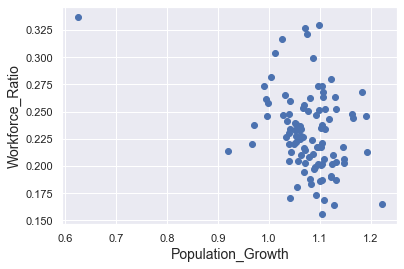

In [13]:
plt.scatter(data['Population_Growth'],data['Workforce_Ratio'])
plt.xlabel('Population_Growth', size=14)
plt.ylabel('Workforce_Ratio', size=14)

plt.show()

### K-mean cluster

In [14]:
z = data.iloc[:,52:]
z.head()

,Workforce_Ratio
0,0.234138
1,0.239171
2,0.265569
3,0.233607
4,0.206625


In [15]:
kmeans = KMeans(2)
kmeans.fit(z)

KMeans(n_clusters=2)

In [16]:
identified_clusters = kmeans.fit_predict(z)
identified_clusters

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

Text(0, 0.5, 'Workforce_Ratio')

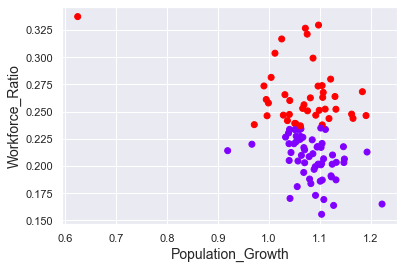

In [17]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['Population_Growth'],data_with_clusters['Workforce_Ratio'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Population_Growth', size=14)
plt.ylabel('Workforce_Ratio', size=14)


In [19]:
clusters = identified_clusters.tolist()
data['clusters'] = clusters

### Find out the city with cluster label

In [20]:
data[['NAME', 'clusters']].head()

,NAME,clusters
0,New York,0
1,Los Angeles,1
2,Chicago,1
3,Houston,0
4,Phoenix,0


### Elbow method

Text(0, 0.5, 'WCSS')

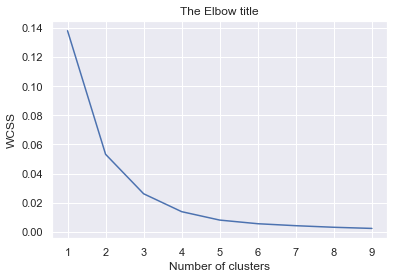

In [10]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(z)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## SVM

### Define the classification

In [13]:
data['Workforce_Ratio'].mean()

0.23097068684713573

### Set latitude and longitude as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

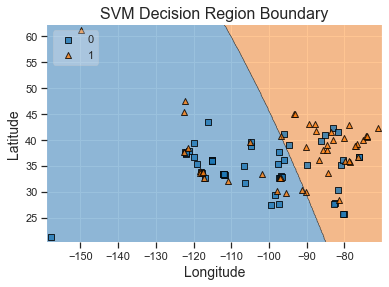

In [23]:
X = data[['X', 'Y']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]

clf = svm.SVC()
clf.fit(X,Y)

plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Find out the city with classification label

In [28]:
data['classification'] = Y
data[['NAME', 'classification']].head()

,NAME,classification
0,New York,1
1,Los Angeles,1
2,Chicago,1
3,Houston,1
4,Phoenix,0



### Set race and median male age as axis

In [21]:
X = data[['MULT_RACE', 'MED_AGE_M']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)

SVC()

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

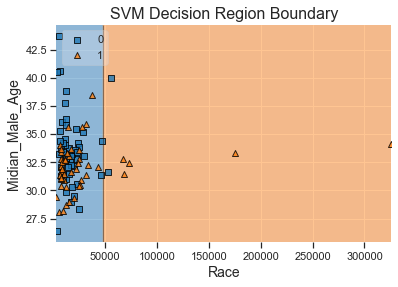

In [22]:
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Race', size=14)
plt.ylabel('Midian_Male_Age', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set population and average family size as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

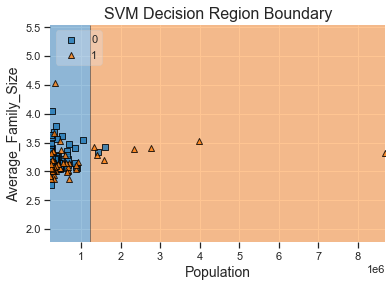

In [32]:
X = data[['POPULATION', 'AVE_FAM_SZ']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Population', size=14)
plt.ylabel('Average_Family_Size', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set population and number of males as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

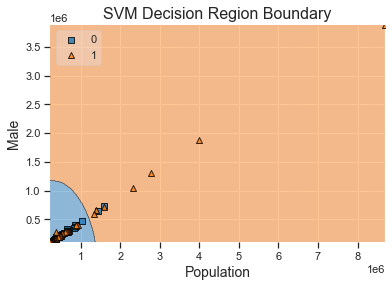

In [30]:
X = data[['POPULATION', 'MALES']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Population', size=14)
plt.ylabel('Male', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set median male age and median female age as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

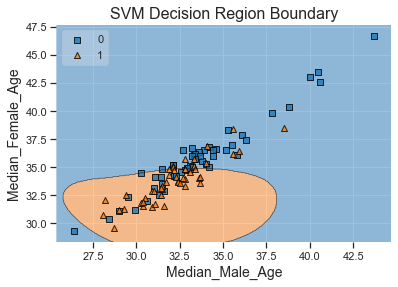

In [31]:
X = data[['MED_AGE_M', 'MED_AGE_F']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Median_Male_Age', size=14)
plt.ylabel('Median_Female_Age', size=14)

plt.title('SVM Decision Region Boundary', size=16)